## Simulations for the Transtion Matrix

In [1]:
import numpy as np

S = np.array([0.6177, 0.8327, 1.0000, 1.2009, 1.6188])

pi = np.array([[0.7497 ,0.2161 ,0.0322 ,0.002 ,0],[0.2161 ,0.4708 ,0.2569 ,0.0542 ,0.002],[0.0322 ,0.2569 ,0.4218 ,0.2569 ,0.0322],[0.002 ,0.0542 ,0.2569 ,0.4708 ,0.2161],[0 ,0.002 ,0.0322 ,0.2161 ,0.7497]])


In [9]:
def get_state(s,pi):
    # Input initital state and take choice based in the list
    trans_Pr = pi[s]
    states = np.arange(len(pi))
    next_state_index = np.random.choice(states, p = trans_Pr)

    return int(next_state_index)

# Code is index based so need to ensure you extract this from any s you use

In [18]:


def history_generation(N, S, pi):
    # Make random first choice then repeat this
    init = np.random.choice(np.arange(len(S)))
    temp = np.zeros(N)
    current_state = init
    for i in range(N):
        next_state = get_state(current_state, pi)
        temp[i] = S[next_state]
        current_state = next_state
    
    return temp

In [20]:
history = history_generation(1000,S,pi)

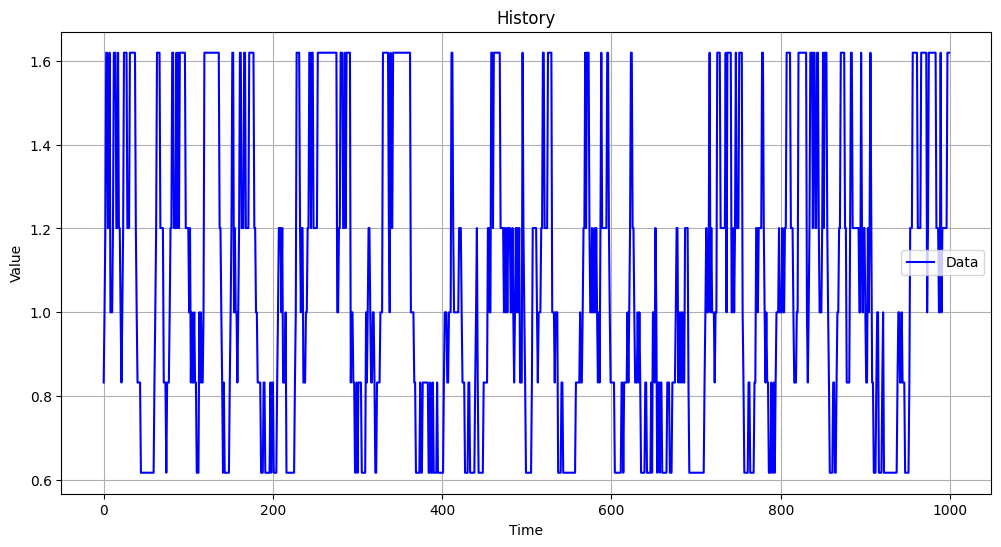

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(history))

plt.figure(figsize=(12, 6))
sns.lineplot(x=x, y=history, color='b', label='Data')

plt.title("History")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.show()

Volatile, but periods of persistance seem to exist. To explore further we can find the variance and the ACF of the history.

<Figure size 1000x600 with 0 Axes>

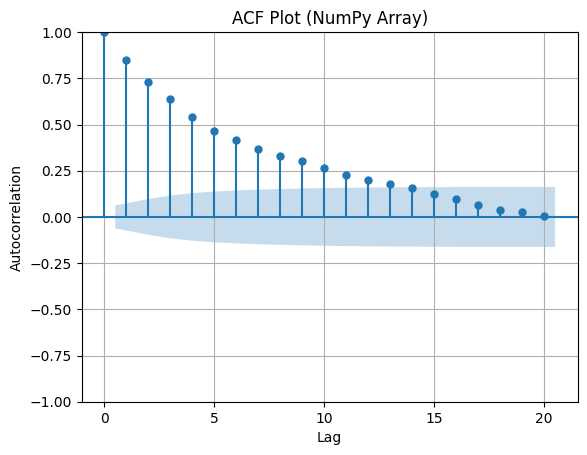

Variance : 0.13246835267484


In [30]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot ACF
plt.figure(figsize=(10, 6))
plot_acf(history, lags=20, alpha=0.05, title="ACF Plot (NumPy Array)")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.grid(True)
plt.show()

var = np.var(history)

print(f"Variance : {var}")

The above shows that the process is very persistant (not a surprise as the transition matrix is diagonal 'dominant').

## Hugget Model

#### Pseudo Code
1. Firstly we need to create a linear space for the $a,s$ terms. Additionally, set up constants and functions for the utility that we will need to call later in the form of a 3d array (for all possible combinations).
2. VFI step:
   intialise a value for the value function matrix
   for iter in max_iter:
       for a in a_grid:
           for s in s_grid:
               . compute the value function and then find the maximum
               . Update the value function
       Check if we have converged or not based on some tolerance set in 1.
3. Now extract the policy function based on the result from 2, by taking the argmax instead of just the max. And populate the matrix P.
4. Given that we have the policy functions, we can find a distribution where $a,s$ form the basis of that distribution.
   To find it starting with a uniform result and then multiply with the policy function till we get convergence to a stationary distribution.
5. Simulate using the distribution and add up the capital selections, and check if as we raise the time extent we get convergence of the curves.
6. Bi-Section Step:
   Now we repeat 4 and try to find 2 intial conditions one where the asset demand sum is positive and one where negative
   if assetr_1>0 and assetr_2<0:
       compute r_3 = r_1+r_2/2
   compute assetr_3
   if assetr_3 > 0:
       r_1 = r_3 and vice versa if iterating from the left
   Finally just check the convergence condition (demand is close to zero)
7. Use the converged interest rate to repeat from steps 1 to 4 and find a distribution. Then just simulate from this and plot a histogram.

In [ ]:
# TO DO implement the above code in the weekdays
